## Application Flow

Before proceeding with the algorithm, let’s first discuss the lifecycle of an unsupervises machine learning model. This diagram explains the creation of an unsupervised Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for an unsupervised machine learning model looks like:

<img src="unsupervised_ApplicationFlow.PNG" width= "300">

## Clustering

Let’s suppose we give a child different objects to group. How does a child make a group? The child may group over the colour, over the shape, over the hardness or softness of the objects etc. The basic idea here is that the child tries to find out similarities and dissimilarities between different objects and then tries to make a group of similar objects. This is called **clustering**, the method of identifying similar instances and keeping them together.
In Other words, clustering identifies homogeneous subgroups among the observations.


Clustering is an unsupervised approach which finds a structure/pattern in a collection of unlabeled data.
A cluster is a collection of objects which are “similar” amongst themselves and are “dissimilar” to the objects belonging to a different cluster.
For example:


<img src="https://summerofhpc.prace-ri.eu/wp-content/uploads/2013/07/k-means_ilustration.png">


In the figure above, we can easily identify 4 different clusters. The clustering criteria here is distance. Whichever points are near to each other are kept in the same cluster and the faraway points belong to a different cluster


#### The Goal of Clustering

The goal of clustering is to determine the intrinsic groups in unlabeled data. The question is: what constitutes a good cluster? It can be shown that there is no absolute “best” criterion for cluster validation. Consequently, it is the user who must supply the criterion for validating the cluster. For example, we might be interested in finding representatives of homogeneous instances for finding the  “natural clusters” and identifying their unknown properties ( like “natural” data types), for finding appropriate groupings or in finding unusual(which are different from all other data) data objects (outlier detection).


### Applications
The scikit-learn book describes the various applications of clustering as follows:

* __For customer segmentation:__ You can cluster your customers based on their purchases,their activity on your website, and so on. This is useful to understand who your customers are and what they need, so you can adapt your products and marketing campaigns to each segment. For example, this can be useful in recommender systems to suggest content that other users in the same cluster enjoyed.

* __For data analysis:__ When analyzing a new dataset, it is often useful to first discover clusters of similar instances, as it is often easier to analyze clusters separately.

* __As a dimensionality reduction technique:__ Once a dataset has been clustered, it is usually possible to measure each instance’s affinity with each cluster (affinity is any measure of how well an instance fits into a cluster). Each instance’s feature vector x can then be replaced with the vector of its cluster affinities. If there are k clusters, then this vector is k dimensional. This is typically much lower dimensional than the original feature vector, but it can preserve enough information for further processing.

* __For anomaly detection (also called outlier detection):__ Any instance that has a low affinity to all the clusters is likely to be an anomaly. For example, if you have clustered the users of your website based on their behavior, you can detect users with unusual behavior, such as an unusual number of requests per second, and so on. Anomaly detection is particularly useful in detecting defects in manufacturing, or for fraud detection.

* __For semi-supervised learning:__ If you only have a few labels, you could perform clustering and propagate the labels to all the instances in the same cluster. This can greatly increase the amount of labels available for a subsequent supervised learning algorithm, and thus improve its performance.
.
* __For search engines:__ For example, some search engines let you search for images that are similar to a reference image. To build such a system, you would first apply a clustering algorithm to all the images in your database: similar images would end up in the same cluster. Then when a user provides a reference image, all you need to do is to find this image’s cluster using the trained clustering model, and you can then simply return all the images from this cluster.

* __To segment an image:__ By clustering pixels according to their color, then replacing each pixel’s color with the mean color of its cluster, it is possible to reduce the number of different colors in the image considerably. This technique is used in many object detection and tracking systems, as it makes it easier to detect the contour of each object.


##### Main Requirements:
The primary requirements that should be met by a clustering algorithm are:
* It should be scalable
* It should be able to deal with attributes of different types;
* It should be able to discover arbitrary shape clusters;
* It should have an inbuilt ability to deal with noise and outliers;
* The clusters should not vary with the order of input records;
* It should be able to handle data of high dimensions.
* It should be easy to interpret and use.


##### Approaches for Clustering:
The clustering approaches can be broadly divided into two categories: _Agglomerative_ and _Divisive_.

**Agglomerative:** This approach first considers all the points as individual clusters and then finds out the similarity between two points, puts them into a cluster. Then it goes on finding similar points and clusters until there is only one cluster left i.e., all points belong to a big cluster. This is also called the bottom-up approach.

**Divisive:** It is opposite of the agglomerative approach. It first considers all the points to be part of one big cluster and in the subsequent steps tries to find out the points/ clusters which are least similar to each other and then breaks the bigger cluster into smaller ones. This continues until there are as many clusters as there are datapoints. This is also called the top-down approach.


### K-Means Clustering

It was proposed by Stuart Lloyd at the Bell Labs in 1957 as a technique for pulse-code modulation,
but it was only published outside of the company in 1982, in a paper titled
_“Least square quantization in PCM”._By then, in 1965, Edward W. Forgy had published
virtually the same algorithm, so K-Means is sometimes referred to as Lloyd-Forgy.


K-Means is a clustering approach in which the data is grouped into K distinct non-overlapping clusters based on their distances from the K centres. The value of **K** needs to be specified first and then the algorithm assigns the points to exactly one cluster.


##### Theory

The theory discussed above can be mathematically expressed as:
* Let C1, C2, Ck be the K clusters
* Then we can write: $C_1 U C_2 UC_3 U…UC_k $={1,2,3,…,n} i.e., each datapoint has been assigned to a cluster.
* Also, 
<img src='non_overlapping.PNG' width='300'>
This means that the clusters are non-overlapping.

* The idea behind the K-Means clustering approach is that the within-cluster variation amongst the point should be minimum. The within-cluster variance is denoted by: W(Ck).Hence, according to the statement above, we need to  minimize this variance for all the clusters. Mathematically it can be written as:
<img src='minimize_ck.PNG' width='300'>

* The next step  is to define the criterion for measuring the within-cluster variance. Generally, the criterion is the Euclidean distance between two data points.
<img src='wck_formula.PNG' width='300'>

* The above formula says that we are calculating the distances between all the point in a cluster, then we are repeating it for all the K clusters(That’s why two summation signs) and then we are dividing it by the number of observation in the clusters (Ck is the number of observations in the Kth cluster) to calculate the average.

So, ultimately our goal is to minimize:

<img src='final_ck.PNG' width='300'>

The following algorithm steps are used to solve this problem




#### Algorithm:
1. Randomly assign K centres.
2. Calculate the distance of all the points from all the K centres and allocate the points to cluster based on the shortest distance. The model’s _inertia_ is the mean squared distance between each instance and its closest centroid. The goal is to have a model with the lowes intertia.
3. Once all the points are assigned to clusters, recompute the centroids.
4. Repeat the steps 2 and 3 until the locations of the centroids stop changing and the cluster allocation of the points becomes constant.

#### Python Explanation:

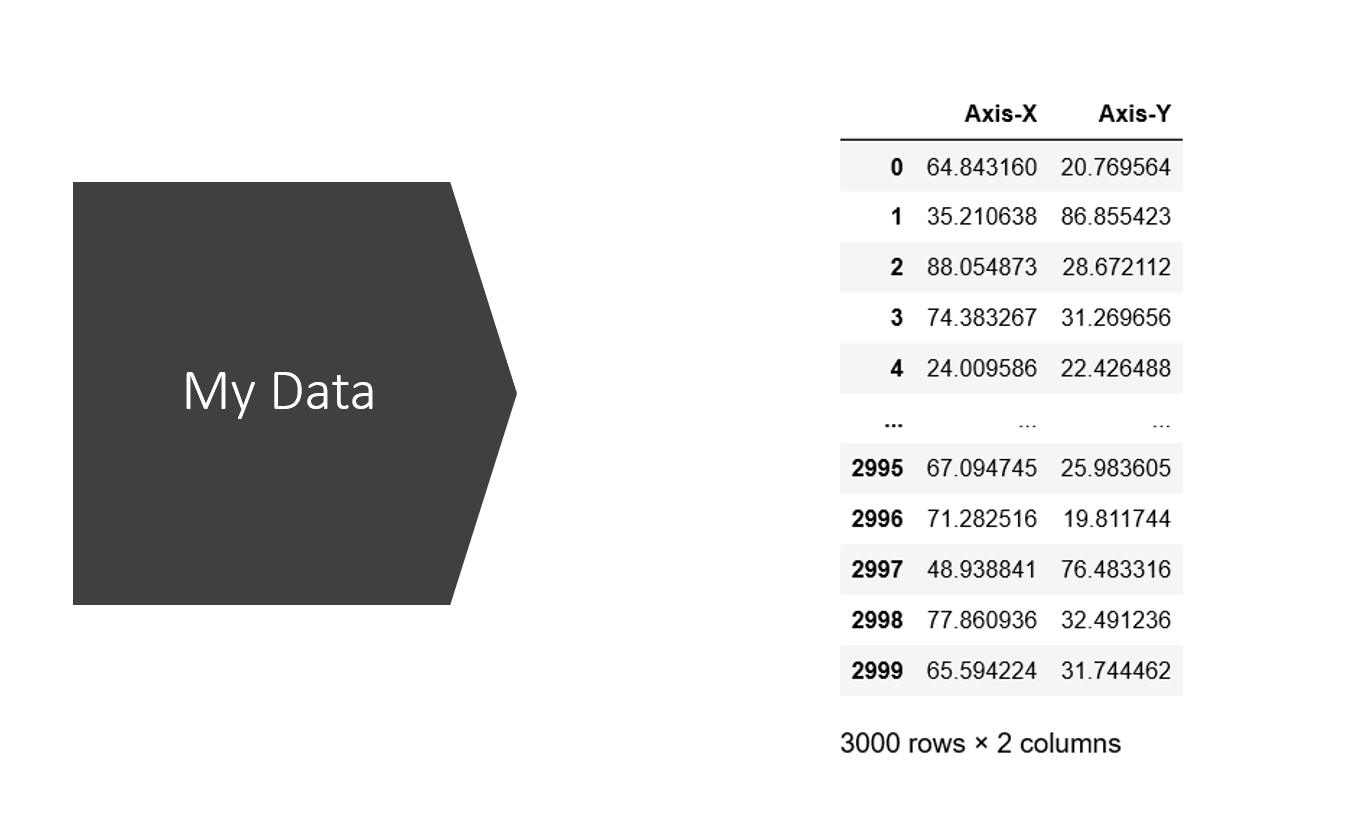
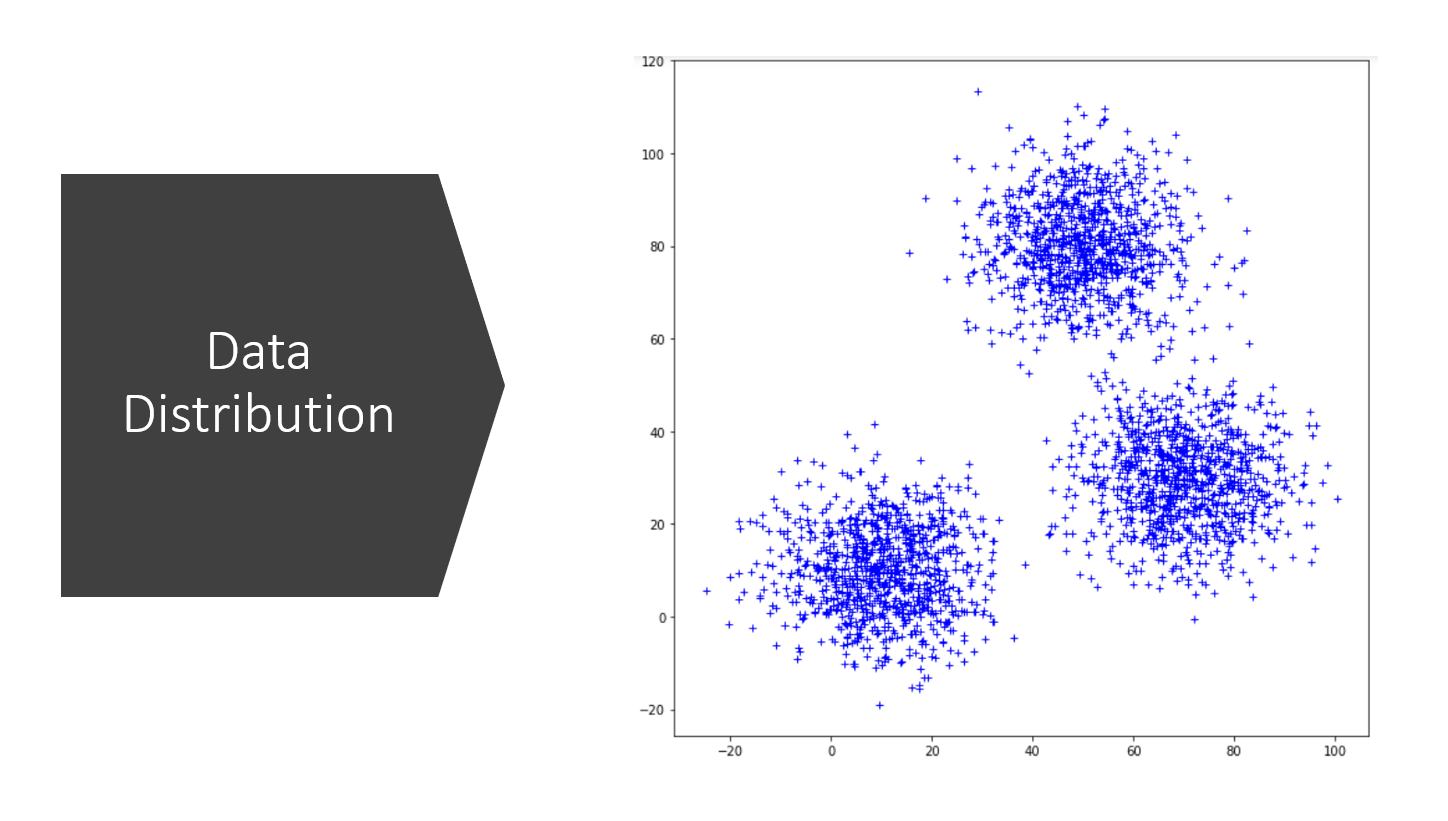
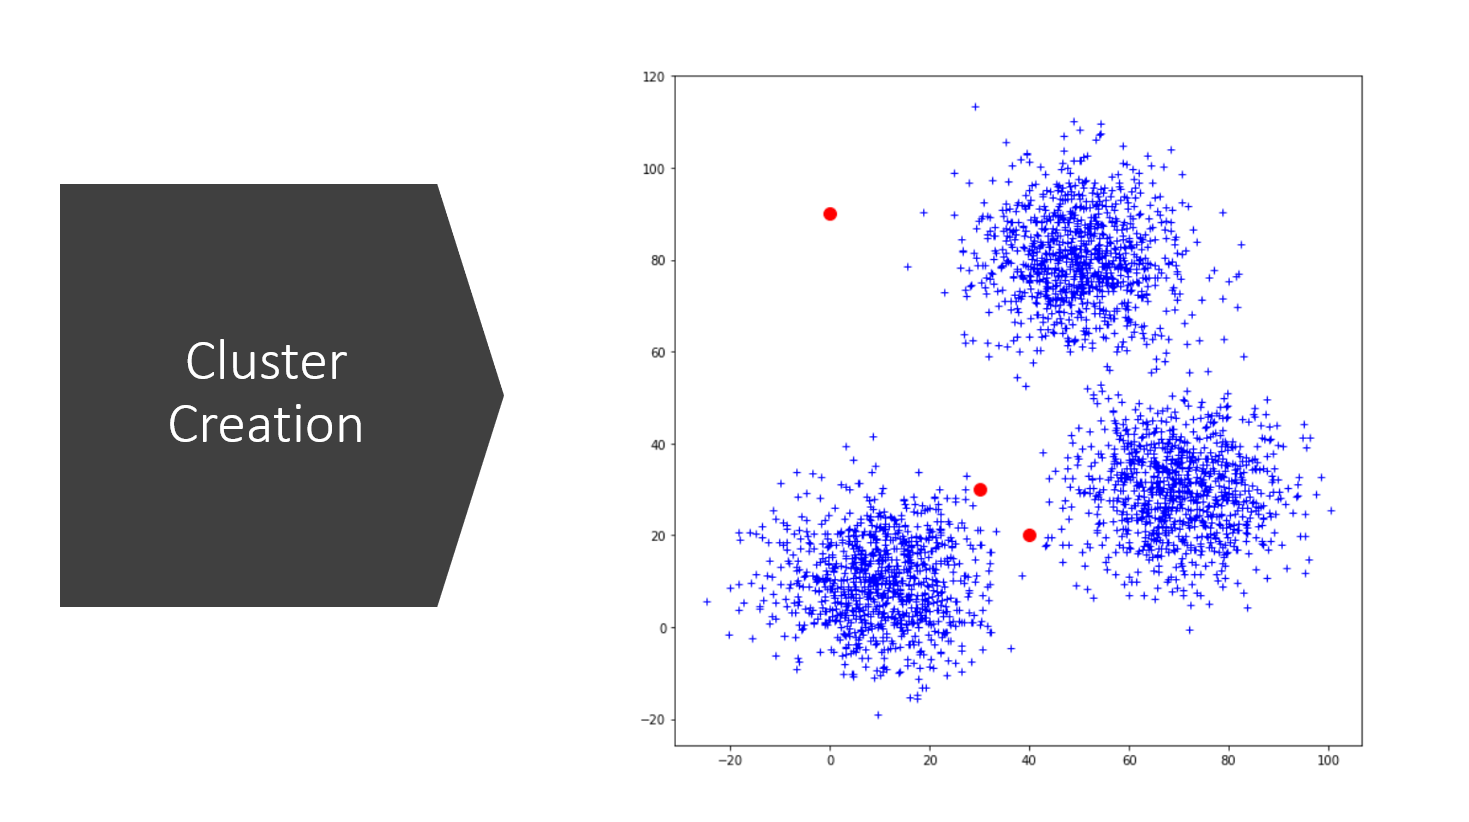
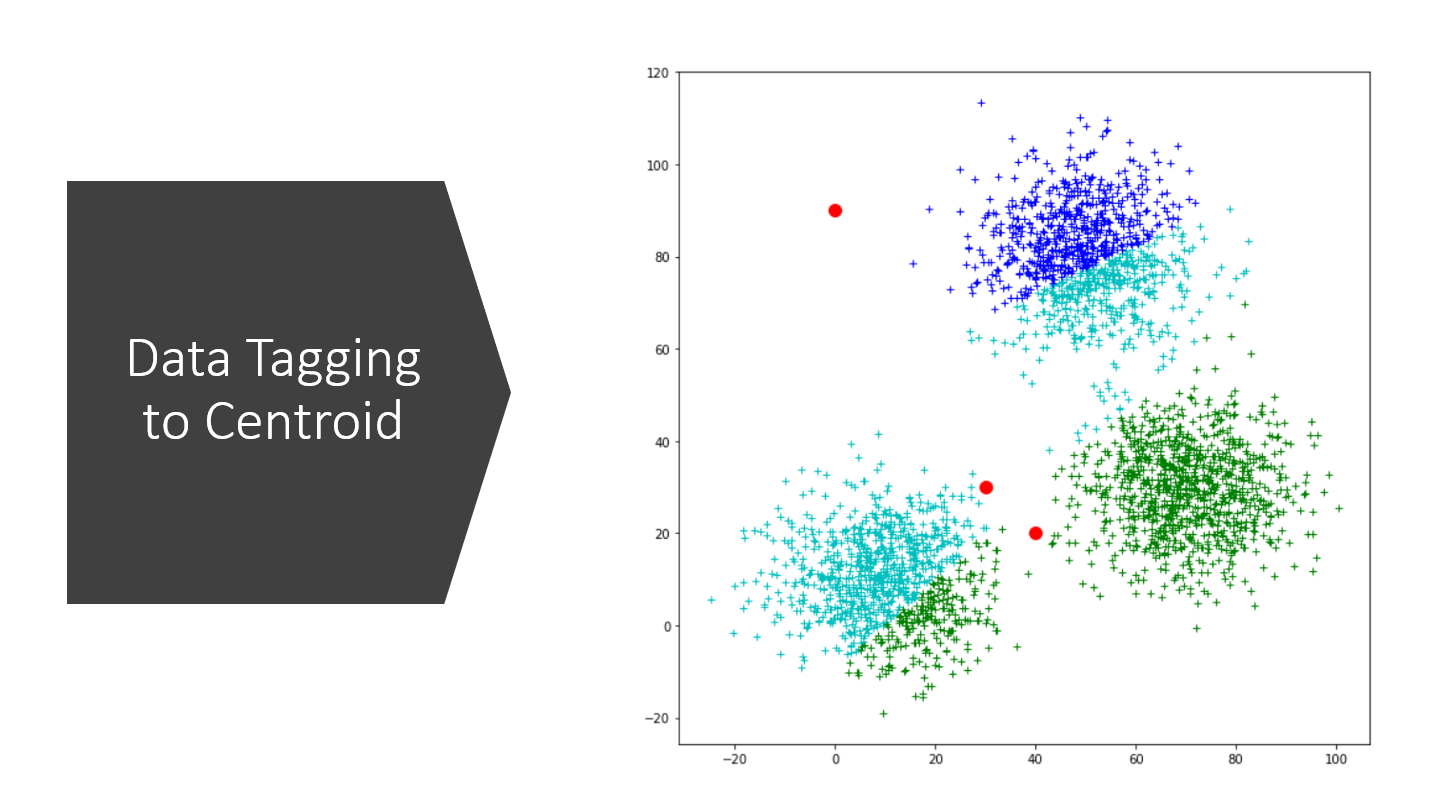
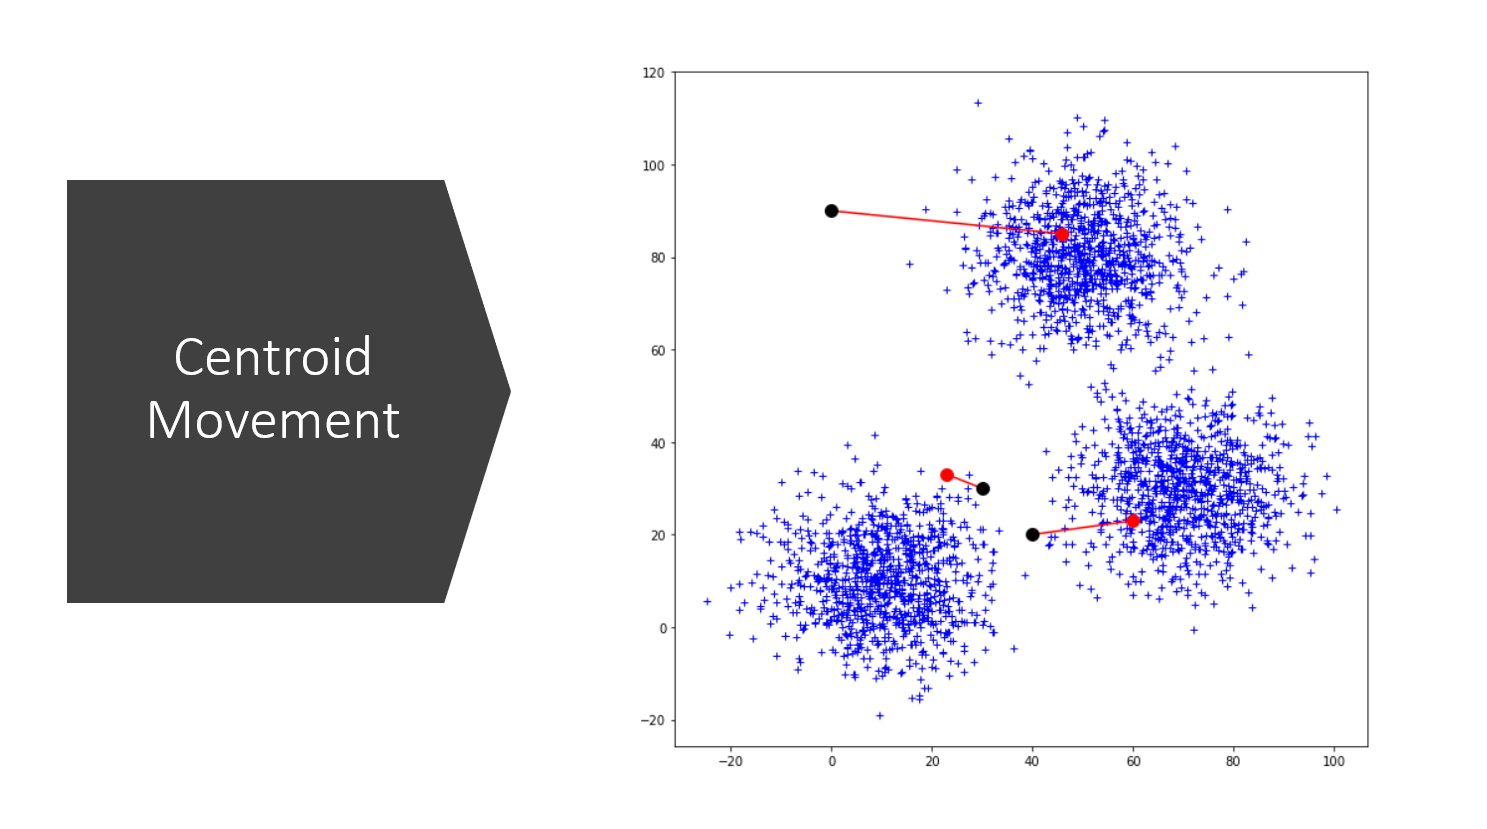

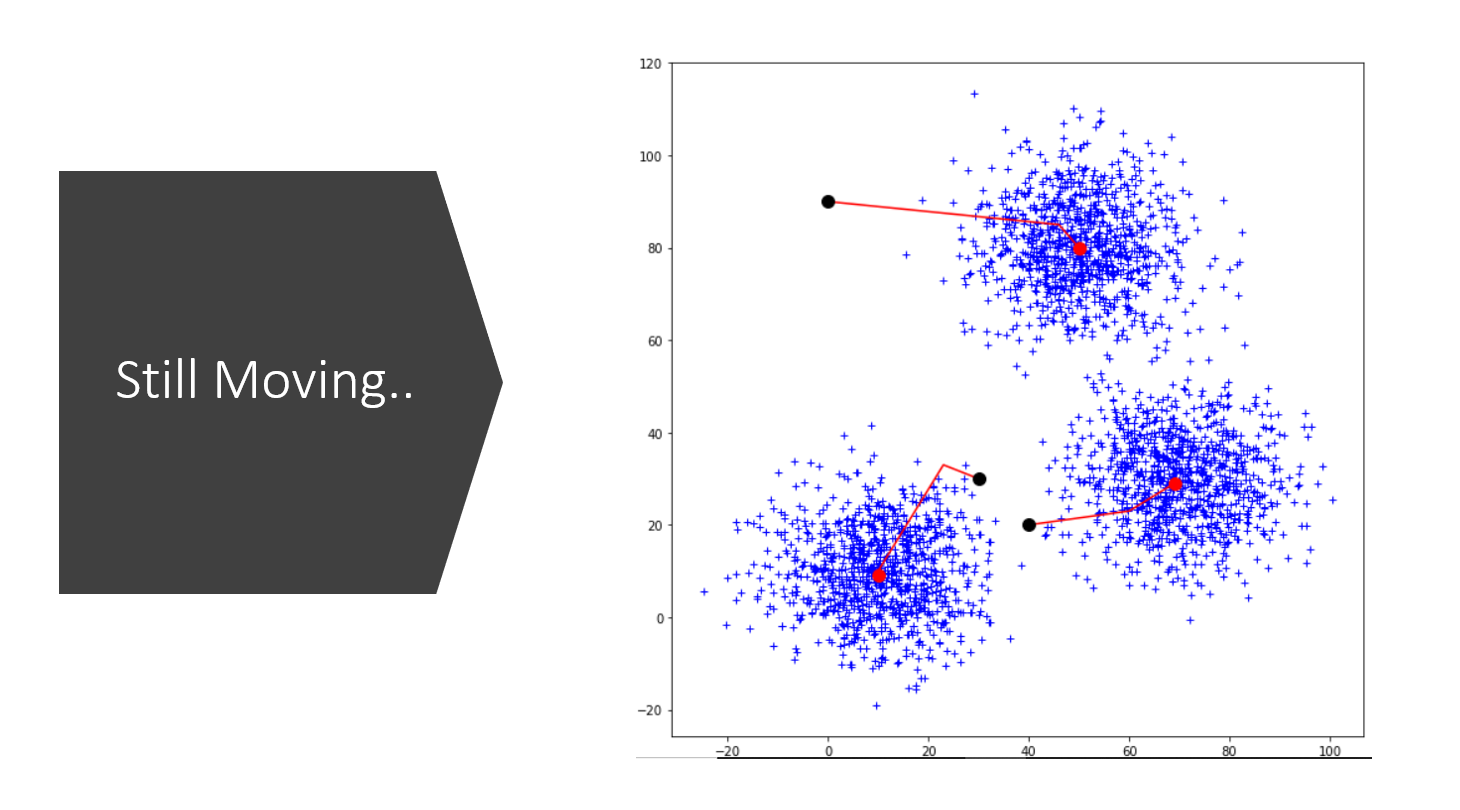
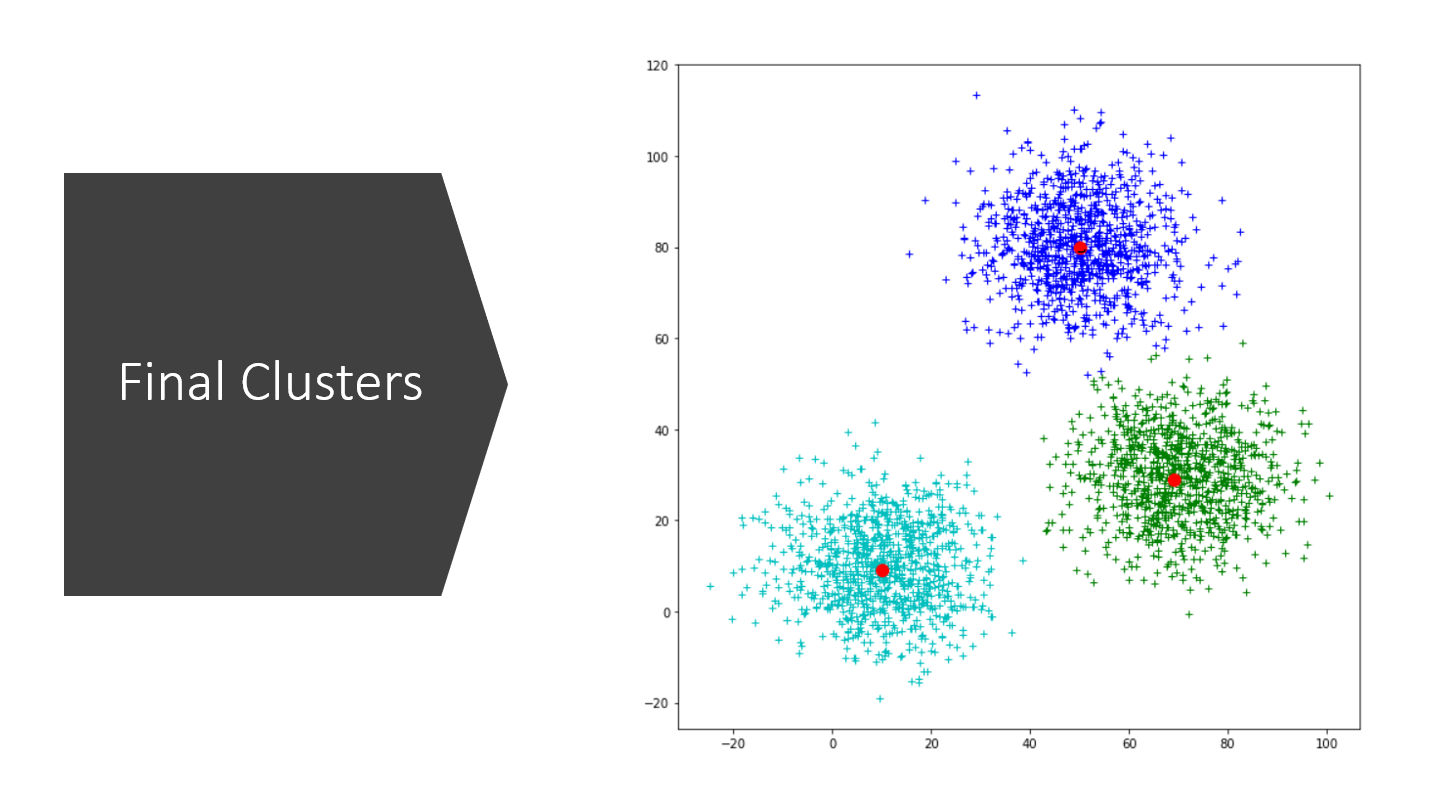

The diagram above shows the step by step implementation of the K-Means algorithm.

As we saw earlier, we need to provide the value of K beforehand. But the question is how to get a good  value of K. An optimum value of K is obtained using the Elbow Method.

###### The Elbow-Method

This method is based on the relationship between the within-cluster sum of squared distances(WCSS Or Inertia) and the number of clusters. It is observed that first with an increase in the number of clusters WCSS decreases steeply and then after a certain number of clusters the drop in WCSS is not that prominent. The point after which the graph between WCSS and the number of clusters becomes comparatively smother is termed as the elbow and the number of cluster at that point are the optimum number of clusters as even after increasing the clusters after that point the variation is not decreasing by much i.e., we have accounted for almost all the dissimilarity in the data. An elbow-curve looks like:

<img src='elbow.PNG' width='500'>


##### An example with actual data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

In [ ]:
#dataset
X =dataset[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

In [ ]:
#Elbow method
from sklearn.cluster import KMeans

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
X.head()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

## Model Evaluation

In [ ]:
# Just like in supervised learning we have a metric in unsupervised learning as well
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X,y_kmeans)

### Sample prediction

In [ ]:
X.head()

In [ ]:
# Keep same cluster customers in seperate dataset
cluster_4_customers= dataset[y_kmeans==4]
print (cluster_4_customers)

In [ ]:
# It predicts the cluster number to which the datapoint belongs to
test=kmeans.predict(np.asarray([[140,456]]))
test[0]

In [ ]:
# Visualising the clusters
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'], X[y_kmeans == 0]['Spending Score (1-100)'], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'], X[y_kmeans == 1]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'], X[y_kmeans == 2]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'], X[y_kmeans == 3]['Spending Score (1-100)'], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'], X[y_kmeans == 4]['Spending Score (1-100)'], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
kmeans.cluster_centers_

###### Challenges and improvements in K-Means:

1.	We need to specify the number of clusters beforehand.
2.	It is required to run the algorithm multiple times to avoid a sub-optimal solution
3.	K-Means does not behave very well when the clusters have varying sizes, different densities, or non-spherical shapes.
4.	The clusters sometimes vary based on the initial choice of the centroids. An important improvement to the K-Means algorithm, called **K-Means++**, was proposed in a _2006 paper by David Arthur and Sergei Vassilvitskii_. They introduced a smarter initialization step that tends to select centroids that are distant from one another, and this makes the K-Means algorithm much less likely to converge to a suboptimal solution.
5.	Another important improvement to the K-Means algorithm was proposed in a _2003 paper by Charles Elkan_.It considerably accelerates the algorithm by avoiding many unnecessary distance calculations: this is achieved by exploiting the _triangle inequality_ (i.e., the straight line is always the shortest; in a triangle with sides a,b and c=> **a+b>c**) and by keeping track of lower and upper bounds for distances between instances and centroids. 
6.	Yet another important variant of the K-Means algorithm was proposed in a _2010 paper by David Sculley_. Instead of using the full dataset at each iteration, the algorithm is capable of using **mini-batches**, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of 3 or 4 and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the **MiniBatchKMeans** class. You can just use this class like the KMeans class:


In [ ]:
# MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit_predict(X)

### Hierarchical clustering

One main disadvantage of K-Means is that it needs us to pre-enter the number of clusters (K). Hierarchical clustering is an alternative approach which does not need us to give the value of K beforehand and also, it creates a beautiful tree-based structure for visualization.

Here, we are going to discuss the bottom-up (or Agglomerative) approach of cluster building.
We start by defining any sort of similarity between the datapoints. Generally, we consider the Euclidean distance. The points which are closer to each are more similar than the points which re farther away. The Algorithms starts with considering all points as separate clusters and then grouping pints together to form clusters.


**The Algorithm:**

1.	Begin with n observations and a measure (such as Euclidean distance) of all the n(n−1)/2 pairwise dissimilarities(or the Euclidean distances generally). Treat each observation as its own cluster. Initially, we have n clusters.
2.	Compare all the distances and put the two closest points/clusters in the same cluster. The dissimilarity(or the Euclidean distances) between these two clusters indicates the height in the dendrogram at which the fusion line should be placed.
3.	Compute the new pairwise inter-cluster dissimilarities(or the Euclidean distances) among the remaining clusters.
4.	Repeat steps 2 and 3 till we have only one cluster left.


**Code Example**

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
# Load the dataset
data = load_wine()
X = data.data

# Convert to DataFrame
wine_df = pd.DataFrame(X, columns=data.feature_names)
wine_df.head()

### Some theory about linkages

Initially, hierarchical clustering starts out with clusters consisting of individual points. 

Later, it compares clusters with each other and merges the two "closest" clusters.

Since clusters are sets of points, there are various linkage methods:

- Single Linkage: cluster distance = smallest pairwise distance
- Complete Linkage: cluster distance = largest pairwise distance
- Average Linkage: cluster distance = average pairwise distance
- Centroid Linkage: cluster distance=  distance between the centroids of the clusters
- Ward’s Linkage: cluster criteria= Minimize the variance in the cluster


#### MinMaxScaler 
 
The MinMaxScaler is a data preprocessing technique commonly used in machine learning and data analysis to scale numerical features to a specific range, typically between 0 and 1. It linearly transforms the data so that the minimum value of the original feature becomes 0, and the maximum value becomes 1. It can also scale data to any other desired range by specifying a custom range.  

#### Formula
X_scaled = (X - X_min) / (X_max - X_min)

In [ ]:
X= MinMaxScaler().fit_transform(wine_df)
X[:5]

In [ ]:
plt.figure(figsize=(20,6))
dendo = dendrogram(linkage(X,method='complete'))
plt.title('Dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance ')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
group = AgglomerativeClustering(n_clusters=3)
cluster = group.fit_predict(X)
print (cluster)

In [ ]:
# Model evaluation tool
from sklearn.metrics import silhouette_score

# Check how well your model is making clusters
silhouette_score(wine_df,cluster)

In [ ]:
## Save data according to the cluster for further analysis/process.
q_1 = wine_df[cluster==0]
q_2 = wine_df[cluster==1]
q_3 = wine_df[cluster==2]

In [ ]:
q_2.head()

### DBSCAN(Density Based Spatial Clustering of Apllications with Noise)

It is an unsupervised machine learning algorithm.This algorithm defines clusters as continuous regions of high density.

Some definitions first:

**Epsilon:** This is also called eps. This is the distance till which we look for the neighbouring points.

**Min_points:** The minimum number of points specified by the user.

**Core Points:** If the number of points inside the _eps radius_ of a point is greater than or equal to the *min_points* then it’s called a core point.

**Border Points:** If the number of points inside the _eps radius_ of a point is less than the *min_points* and it lies within the _eps radius_ region of a core point, it’s called a border point.

**Noise:** A point which is neither a core nor a border point is a noise point.


Let’s say if the eps=1 and min_points =4

<img src="point_def.PNG" width="400">




Algorithm Steps:

1.	The algorithm starts with a random point in the dataset which has not been visited yet and its neighbouring points are identified based on the eps value.
2.	If the point contains greater than or equal points than the min_pts, then the cluster formation starts and this point becomes a _core point_, else it’s considered as noise. The thing to note here is that a point initially classified as noise can later become a border point if it’s in the eps radius of a core point.
3.	If the point is a core point, then all its neighbours become a part of the cluster. If the points in the neighbourhood turn out to be core points then their neighbours are also part of the cluster.
4.	Repeat the steps above until all points are  classified into different clusters or noises.



This algorithm works well if all the clusters are dense enough, and they are well separated by low-density regions.

##### Python Example

In [ ]:
# Necessary Imports

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
# Data creation
#centers = [[1, 1], [-1, -1], [1, -1]]
#X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
#                            random_state=0)  # generate sample blobs

In [ ]:
# CSV file
dataset=pd.read_csv('Mall_Customers.csv')

#dataset
X =dataset[['Annual Income (k$)','Spending Score (1-100)']]
X.head()

In [ ]:
X = StandardScaler().fit_transform(X)
X[:5]

In [ ]:
# DBSCAN
db = DBSCAN(eps=0.4, min_samples=4).fit(X)

In [ ]:
labels = db.labels_  # similar to the model.fit() method, it gives the labels of the clustered data

print (labels)

In [ ]:
len(set(labels))

In [ ]:
1 if -1 in labels else 0

In [ ]:
# Number of clusters in labels, ignoring noise if present.

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # the label -1 is considered as noise by the DBSCAN algorithm
n_noise_ = list(labels).count(-1)  # calculating the number of noises (-1)

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# For demonstration purpose only
Note - This code is available in our github repository

In [ ]:
# Below code is for showcasing in diagram. Nothing related to model building

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)  # creating an array of true and false as the same size as db.labels

core_samples_mask[db.core_sample_indices_] = True  # setting the indices of the core regions to True




# Plot result
import matplotlib.pyplot as plt

# Black  is used for noise.
unique_labels = set(labels)  # identifying all the unique labels/clusters

colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]  # creating the list of colours, generating the colourmap



for k, col in zip(unique_labels, colors):
    
    
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)   # assigning class members for each class
    

    xy = X[class_member_mask & core_samples_mask] # creating the list of points for each class
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    

    xy = X[class_member_mask & ~core_samples_mask] # creating the list of noise points
    
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='b', markersize=14)
    
    

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Finding counts in each cluster

In [ ]:
np.unique(labels, return_counts=True)

#### Select only noises or outliers for further action.

In [ ]:
noises = X[labels == -1]

print (noises)

In short, DBSCAN is a very simple yet powerful algorithm, capable of identifying any number of clusters, of any shape, it is robust to outliers, and it has just two hyper parameters(eps and min_samples). However, if the density varies significantly across the clusters, it can be impossible for it to capture all the clusters properly. Moreover, its computational complexity is roughly O(m log m), making it pretty close to linear with regards to the number of instances.